In [31]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from pydub import AudioSegment
import sounddevice as sd
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

x, Fs = librosa.load("../git/sounds/hit.wav") 

V tejto časti importujeme potrebné knižnice, potom nastavíme tému a farebnú paletu pre grafické zobrazenia.

In [26]:
def echoFF(x, Fs, dTime, b):
    dSamples = math.ceil(dTime * Fs)  
    Nx = len(x) - 1  
    Ny = Nx + dSamples  
    l = np.zeros((Ny, 1))  
    y = l.flatten()  
    for n in range(Ny):
        if n < dSamples + 1:
            y[n] = x[n]  
        elif n > Nx:
            y[n] = b * x[n - dSamples]  
        else:
            y[n] = x[n] + b * x[n - dSamples] 
            
    return y

Základnou myšlienkou je, že zvukový signál sa skopíruje a pridá sa k nemu oneskorenie, aby sa vytvoril efekt echo.
Funkcia vráti výstupný signál s efektom echo

In [27]:
delaySec = 0.25
tMax = 1.1*delaySec
Nx = np.fix(tMax * Fs)
nx = int(Nx)
l = np.zeros((nx,1))
x = l.flatten()
x[1] = 1

Jednotlivý impulz sa generuje pomocou funkcie np.zero. Tento impulz sa použije na vytvorenie oneskorenia ozveny.

In [28]:
b = 0.75
h = echoFF(x,Fs,delaySec,b);

Určí sa koeficient zosilnenia echa b a vyvolá sa funkcia echoFF s argumentmi x, Fs, delaySec a b. V rámci funkcie echoFF sa vypočíta oneskorený signál pomocou impulzu ako vzorky.

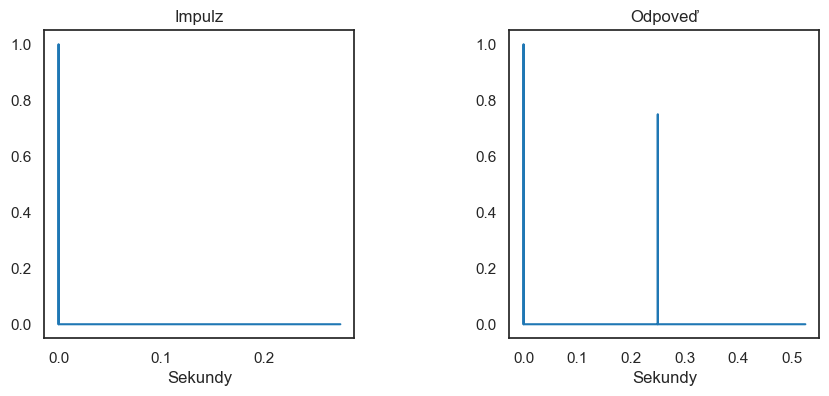

In [29]:
import matplotlib.pyplot as plt

time1 = np.arange(0, len(x)/Fs, 1/Fs)
time2 = np.arange(0, len(h)/Fs, 1/Fs)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(time1, x)
axes[0].set_title("Impulz")
axes[0].set_xlabel("Sekundy")

axes[1].plot(time2, h)
axes[1].set_title("Odpoveď")
axes[1].set_xlabel("Sekundy")

plt.subplots_adjust(wspace=0.5)

plt.show()


Prvý graf zobrazuje pôvodný zvukový signál a druhý graf zobrazuje ten istý signál s pridaným efektom echo.

In [30]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/hit.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(h, Fs)